In [2]:
import pickle

# Specify the path to your pickle file
pickle_file = "C:\\Users\\omvis\\chess_prediction_project\\train_dataset\\combined_dataset.pkl"

# Load the data
with open(pickle_file, 'rb') as file:
    X, y = pickle.load(file)

# Now X and y are loaded from the pickle file
X


[array([[ 0. ,  0. ,  0. ,  0.6,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.2, -1. ],
        [ 0. ,  0. ,  0. ,  0. , -0.2,  0. ,  0. , -0.2],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0.2],
        [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  1. ,  0. ]]),
 array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ],
        [ 0.4, -0.2,  0. ,  0. ,  0. , -0.2, -0.2,  0. ],
        [ 0. ,  0. ,  0. ,  0. , -0.2,  0. ,  0. , -0.2],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ],
        [ 0.2,  0.2,  0. ,  0. ,  0. ,  0.2,  1. ,  0.2],
        [ 0. ,  0. , -0.6,  0. ,  0. ,  0. ,  0. ,  0. ]]),
 array([[-0.6,  0. ,  0. ,  0. , -0.6,  0. , -1. ,  0. ],
        [-

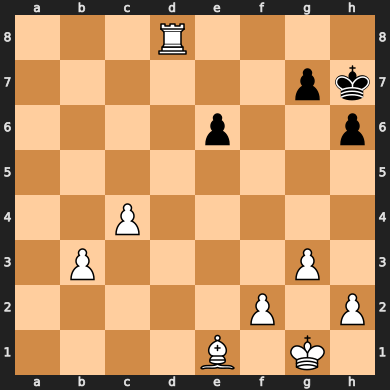

In [3]:
import chess

# Helper function to map piece values back to chess pieces
#piece_to_gray_weights = {'K': 1.0, 'Q': 0.8, 'R': 0.6, 'B': 0.5, 'N': 0.4, 'P': 0.2, 
      #           'k': -1.0, 'q': -0.8, 'r': -0.6, 'b': -0.5, 'n': -0.4, 'p': -0.2, '.': 0.0}
def piece_value_to_chess_piece(value):
    if value == 0.2:
        return chess.PAWN, chess.WHITE
    elif value == -0.2:
        return chess.PAWN, chess.BLACK
    elif value == 0.4:
        return chess.KNIGHT, chess.WHITE
    elif value == -0.4:
        return chess.KNIGHT, chess.BLACK
    elif value == 0.5:
        return chess.BISHOP, chess.WHITE
    elif value == -0.5:
        return chess.BISHOP, chess.BLACK
    elif value == 0.6:
        return chess.ROOK, chess.WHITE
    elif value == -0.6:
        return chess.ROOK, chess.BLACK
    elif value == 0.8:
        return chess.QUEEN, chess.WHITE
    elif value == -0.8:
        return chess.QUEEN, chess.BLACK
    elif value == 1:
        return chess.KING, chess.WHITE
    elif value == -1:
        return chess.KING, chess.BLACK
    else:
        return None, None  # Empty square

# Function to convert 8x8 matrix back to a chess board
def matrix_to_chess_board(matrix):
    board = chess.Board()  # Start with an empty board
    board.clear()
    for i in range(8):
        for j in range(8):
            piece_value = matrix[i][j]
            piece_type, color = piece_value_to_chess_piece(piece_value)
            if piece_type:
                square = chess.square(j, 7 - i)  # Convert (i, j) to UCI square notation
                board.set_piece_at(square, chess.Piece(piece_type, color))
    return board
    
# Example: Rebuilding a chessboard from an 8x8 matrix
#board_state_matrix =[[-0.6,  0. , -0.5, -0.6,  0. , -1. ,  0. ,  0. ],
     #  [-0.2, -0.2,  0. ,  0. , -0.2, -0.2, -0.5, -0.2],
     #  [ 0. ,  0. ,  0. , -0.2,  0. ,  0. , -0.2,  0. ],
     #  [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ],
     #  [ 0. ,  0. ,  0.5,  0. ,  0.2,  0.2,  0. ,  0. ],
      # [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
      # [ 0.2,  0.2,  0.2,  0. ,  0. ,  0. ,  0.2,  0.2],
      # [ 0. ,  0. ,  0. ,  0.6,  0. ,  0.6,  1. ,  0. ]]

# Rebuild the chess board from the matrix
#board = matrix_to_chess_board(board_state_matrix)

# Print the board
#print(board)
chessboard = []

def convert_to_board(X):
    for idx,matrix in enumerate(X):
        board = matrix_to_chess_board(matrix)
        chessboard.append(board)

convert_to_board(X)
chessboard[0]

In [4]:
type(chessboard[0])

chess.Board

In [5]:
# features
# 1) piece activity - opening , middle
def get_piece_activity(board):
    white_activity = len(board.attacks(chess.WHITE))
    black_activity = len(board.attacks(chess.BLACK))
    
    return white_activity - black_activity
    
# 2) king safety - opening , middle
def get_king_safety(board):
    white_king_square = board.king(chess.WHITE)
    black_king_square = board.king(chess.BLACK)
    
    white_king_safety = len(board.attackers(chess.WHITE, white_king_square))
    black_king_safety = len(board.attackers(chess.BLACK, black_king_square))
    
    return white_king_safety- black_king_safety

# 3) double pawns and isolated pawns - all three
def get_pawn_structure(board):
    white_pawns = board.pieces(chess.PAWN, chess.WHITE)
    black_pawns = board.pieces(chess.PAWN, chess.BLACK)
    
    def count_double_and_isolated(pawns):
        double_pawns = 0
        isolated_pawns = 0
        
        for file in chess.FILE_NAMES:
            file_pawns = [square for square in pawns if chess.square_file(square) == chess.FILE_NAMES.index(file)]
            if len(file_pawns) > 1:
                double_pawns += len(file_pawns) - 1
            
            if not any(
                chess.square_file(square) in [chess.FILE_NAMES.index(file) - 1, chess.FILE_NAMES.index(file) + 1]
                for square in pawns
            ):
                isolated_pawns += len(file_pawns)
        
        return double_pawns, isolated_pawns
    
    white_double, white_isolated = count_double_and_isolated(white_pawns)
    black_double, black_isolated = count_double_and_isolated(black_pawns)
    
    return white_double, white_isolated, black_double, black_isolated

# 4) center control - opening , middle
def get_center_control(board):
    center_squares = [chess.D4, chess.E4, chess.D5, chess.E5]
    white_control = sum(board.is_attacked_by(chess.WHITE, square) for square in center_squares)
    black_control = sum(board.is_attacked_by(chess.BLACK, square) for square in center_squares)
    return white_control - black_control

# 5) Mobility - all three
def get_mobility(board):
    """
    Calculates the mobility difference between White and Black.
    
    Args:
        board (chess.Board): The current state of the chessboard.
        
    Returns:
        int: The difference in mobility (White mobility - Black mobility).
    """
    # Get White's mobility
    white_mobility = len(list(board.legal_moves))
    
    # Switch turn to calculate Black's mobility
    board.turn = chess.BLACK
    black_mobility = len(list(board.legal_moves))
    
    # Restore the turn
    board.turn = chess.WHITE
    
    return white_mobility - black_mobility


# 6) Hanging pieces - all three
def get_hanging_pieces(board):
    """
    Returns the difference in the number of hanging pieces for White and Black.
    A hanging piece is a piece that is attacked by the opponent but not protected by its own side.
    
    Args:
        board (chess.Board): The current state of the chessboard.
        
    Returns:
        int: The difference in hanging pieces (White hanging pieces - Black hanging pieces).
    """
    # White hanging pieces
    hanging_white = sum(1 for square in board.pieces(chess.PAWN, chess.WHITE) | board.pieces(chess.KNIGHT, chess.WHITE) |
                        board.pieces(chess.BISHOP, chess.WHITE) | board.pieces(chess.ROOK, chess.WHITE) |
                        board.pieces(chess.QUEEN, chess.WHITE)
                        if len(board.attackers(chess.BLACK, square)) > 0 and len(board.attackers(chess.WHITE, square)) == 0)
    
    # Black hanging pieces
    hanging_black = sum(1 for square in board.pieces(chess.PAWN, chess.BLACK) | board.pieces(chess.KNIGHT, chess.BLACK) |
                        board.pieces(chess.BISHOP, chess.BLACK) | board.pieces(chess.ROOK, chess.BLACK) |
                        board.pieces(chess.QUEEN, chess.BLACK)
                        if len(board.attackers(chess.WHITE, square)) > 0 and len(board.attackers(chess.BLACK, square)) == 0)
    
    return hanging_white - hanging_black


# 7) checks and checkmates threats - middle and end
def get_check_threats(board):
    white_checks = board.is_check() if board.turn == chess.WHITE else 0
    black_checks = board.is_check() if board.turn == chess.BLACK else 0
    return white_checks - black_checks

# 8) Bishop pair advantage - middle , end
def get_bishop_pair(board):
    white_bishops = len(board.pieces(chess.BISHOP, chess.WHITE))
    black_bishops = len(board.pieces(chess.BISHOP, chess.BLACK))
    
    white_has_pair = white_bishops == 2
    black_has_pair = black_bishops == 2
    
    return int(white_has_pair) - int(black_has_pair)

# 9) passed pawns - middle , end
def get_passed_pawns(board):
    """
    Returns the difference in the number of passed pawns for White and Black.
    A passed pawn is a pawn that has no opposing pawns blocking its advance along the file or adjacent files.
    
    Args:
        board (chess.Board): The current state of the chessboard.
        
    Returns:
        int: The difference in passed pawns (White passed pawns - Black passed pawns).
    """
    def is_passed_pawn(square, color):
        # Check if the pawn on 'square' is a passed pawn
        file = chess.square_file(square)
        for direction in [-1, 1]:  # Check the adjacent files
            for i in range(1, 8):  # Check down the file for enemy pawns
                adjacent_square = chess.square(file + direction, chess.square_rank(square) + i)
                if chess.square_rank(adjacent_square) >= 0 and chess.square_rank(adjacent_square) <= 7:
                    if board.piece_at(adjacent_square) and board.piece_at(adjacent_square).color != color and board.piece_at(adjacent_square).piece_type == chess.PAWN:
                        return False
        return True

    # Count passed pawns for White and Black
    passed_white = sum(1 for square in board.pieces(chess.PAWN, chess.WHITE) if is_passed_pawn(square, chess.WHITE))
    passed_black = sum(1 for square in board.pieces(chess.PAWN, chess.BLACK) if is_passed_pawn(square, chess.BLACK))
    
    return passed_white - passed_black


#10) pawn islands - middle , end
def get_pawn_islands(board):
    def count_islands(pawns):
        islands = 0
        previous_file = -1
        for square in pawns:
            current_file = chess.square_file(square)
            if current_file != previous_file + 1:
                islands += 1
            previous_file = current_file
        return islands
    
    white_islands = count_islands(board.pieces(chess.PAWN, chess.WHITE))
    black_islands = count_islands(board.pieces(chess.PAWN, chess.BLACK))
    
    return white_islands - black_islands

#11) king activity - end

def get_king_activity(board, color):
    """
    Evaluates the king's activity in the endgame phase.
    
    Parameters:
    - board (chess.Board): The chess board.
    - color (bool): The color of the king (True for white, False for black).
    
    Returns:
    - float: A score representing the king's activity.
    """
    # Define the center squares (more weight for central squares)
    center_squares = [
        chess.D4, chess.D5, chess.E4, chess.E5,  # Center
        chess.C3, chess.C4, chess.C5, chess.C6,  # Near-center
        chess.F3, chess.F4, chess.F5, chess.F6,
        chess.B2, chess.B3, chess.B4, chess.B5,
        chess.G2, chess.G3, chess.G4, chess.G5,
        chess.A1, chess.A2, chess.B1, chess.B2,  # Least central
        chess.H1, chess.H2, chess.G1, chess.G2
    ]

    # Get king's square
    king_square = board.king(color)
    
    # Calculate centralization score (distance from center squares)
    centralization_score = 0
    if king_square in center_squares:
        # Assign weights based on distance to the center
        if king_square in [chess.D4, chess.D5, chess.E4, chess.E5]:
            centralization_score += 2  # Most central squares
        elif king_square in [chess.C3, chess.C4, chess.C5, chess.C6, chess.F3, chess.F4, chess.F5, chess.F6]:
            centralization_score += 1  # Near-center squares

    # Calculate king's mobility (number of legal moves)
    mobility_score = len(list(board.legal_moves))  # Count of all legal king moves

    # Combine the scores with weights
    activity_score = 1.5 * centralization_score + 0.5 * mobility_score

    return activity_score

#12) king attack score - opening , middle

import chess

def get_king_attack_score(board, color):
    """
    Evaluates the king's safety by checking the attack potential of the opponent's pieces around the king.
    
    Args:
        board (chess.Board): The current state of the chessboard.
        color (chess.Color): The color of the player whose king's safety is being evaluated.
        
    Returns:
        int: A score based on how many opponent pieces threaten the squares around the king.
    """
    # Get the position of the king for the given color
    king_square = board.king(color)
    
    # Get the list of squares adjacent to the king (8 surrounding squares)
    attack_squares = [
        chess.square(king_square % 8 - 1, (king_square // 8) - 1), # Top-left
        chess.square(king_square % 8, (king_square // 8) - 1),     # Top
        chess.square(king_square % 8 + 1, (king_square // 8) - 1), # Top-right
        chess.square(king_square % 8 - 1, (king_square // 8)),     # Left
        chess.square(king_square % 8 + 1, (king_square // 8)),     # Right
        chess.square(king_square % 8 - 1, (king_square // 8) + 1), # Bottom-left
        chess.square(king_square % 8, (king_square // 8) + 1),     # Bottom
        chess.square(king_square % 8 + 1, (king_square // 8) + 1)  # Bottom-right
    ]
    
    # Filter only valid squares (inside the board)
    valid_attack_squares = [square for square in attack_squares if 0 <= square < 64]
    
    # Evaluate the attack potential by the opponent on those squares
    attack_score = 0
    for square in valid_attack_squares:
        # If an opponent's piece attacks the square, add to the score
        if board.piece_at(square) and board.piece_at(square).color != color:
            attack_score += 1  # Add points for opponent pieces threatening the square
    
    return attack_score

#13) rook pair advantage - middle , end
def is_open_file(board, file):
    """
    Checks if a given file is open, meaning it contains no pawns.
    
    Parameters:
    - board (chess.Board): The chess board.
    - file (int): The file to check (0-7 corresponding to columns 'a'-'h').
    
    Returns:
    - bool: True if the file is open (no pawns), False otherwise.
    """
    for rank in range(8):
        square = chess.square(file, rank)
        if board.piece_at(square) and board.piece_at(square).piece_type == chess.PAWN:
            return False
    return True

def get_rook_pair_coordination(board, color):
    """
    Evaluates the coordination between rooks of a given color.
    
    Parameters:
    - board (chess.Board): The chess board.
    - color (bool): The color of the rooks being evaluated (True for white, False for black).
    
    Returns:
    - float: A score representing the coordination between the rooks.
    """
    # Get all rooks of the given color
    rooks = board.pieces(chess.ROOK, color)

    # If less than two rooks, coordination is not applicable
    if len(rooks) < 2:
        return 0.0

    # Extract rook positions
    rook_positions = list(rooks)
    coordination_score = 0

    for i in range(len(rook_positions)):
        for j in range(i + 1, len(rook_positions)):
            rook1 = rook_positions[i]
            rook2 = rook_positions[j]

            # Check if they are on the same rank or file
            if chess.square_rank(rook1) == chess.square_rank(rook2) or chess.square_file(rook1) == chess.square_file(rook2):
                coordination_score += 1.0  # Bonus for being on the same rank/file
            
            # Check if the rooks are protecting each other
            if board.is_attacked_by(color, rook1) and board.is_attacked_by(color, rook2):
                coordination_score += 0.5  # Additional bonus for mutual protection
            
            # Open file bonus
            if is_open_file(board, chess.square_file(rook1)) or is_open_file(board, chess.square_file(rook2)):
                coordination_score += 0.3  # Encourage rooks on open files

    return coordination_score


#14) knight outposts - middle 
def is_outpost_square(board, square, color):
    """
    Determines if a given square is an outpost for a knight, i.e., a square that
    is not attacked by any enemy pawns and is supported by friendly pawns.
    
    Args:
        board (chess.Board): The current state of the chessboard.
        square (int): The square to check (from 0 to 63).
        color (chess.Color): The color of the knight.
        
    Returns:
        bool: True if the square is an outpost, False otherwise.
    """
    # Direction of pawn advancement (white pawns go up, black pawns go down)
    pawn_direction = 1 if color == chess.WHITE else -1
    
    # Get the rank and file of the given square
    rank = chess.square_rank(square)
    file = chess.square_file(square)
    
    # Check if the square is under attack by an opponent pawn (pawn attacks diagonally)
    attack_squares = []
    
    # White pawns attack diagonally up-left and up-right
    # Black pawns attack diagonally down-left and down-right
    if color == chess.WHITE:
        attack_squares = [square - 9, square - 7]  # up-left, up-right
    else:
        attack_squares = [square + 7, square + 9]  # down-left, down-right
    
    # Ensure squares are within the bounds of the board (0-63)
    attack_squares = [sq for sq in attack_squares if 0 <= sq < 64]
    
    # Check if any of the attack squares are occupied by an opponent's pawn
    for attack_square in attack_squares:
        if board.piece_at(attack_square) and board.piece_at(attack_square).color != color and board.piece_at(attack_square).piece_type == chess.PAWN:
            return False  # It's attacked by an enemy pawn, so not an outpost
    
    # Check if the square is supported by a friendly pawn (pawn could be directly in front or diagonal)
    support_squares = []
    
    # White pawns support from below-left, below-right
    # Black pawns support from above-left, above-right
    if color == chess.WHITE:
        support_squares = [square + 7, square + 9]  # below-left, below-right
    else:
        support_squares = [square - 7, square - 9]  # above-left, above-right
    
    # Ensure the support squares are within bounds
    support_squares = [sq for sq in support_squares if 0 <= sq < 64]
    
    for support_square in support_squares:
        if board.piece_at(support_square) and board.piece_at(support_square).color == color and board.piece_at(support_square).piece_type == chess.PAWN:
            return True  # The square is supported by a friendly pawn
    
    return False  # The square is not supported by a friendly pawn



def get_knight_outpost_score(board, color):
    """
    Calculate the score for knight outposts for a given color.

    Parameters:
    - board (chess.Board): The chess board.
    - color (bool): The color to evaluate (True for white, False for black).

    Returns:
    - float: A score representing the quality of knight outposts.
    """
    knights = board.pieces(chess.KNIGHT, color)
    score = 0.0

    for knight in knights:
        if is_outpost_square(board, knight, color):
            # Assign a score based on strategic value (center squares are more valuable)
            rank = chess.square_rank(knight)
            file = chess.square_file(knight)
            if 3 <= rank <= 4 and 3 <= file <= 4:  # Central squares
                score += 2.0
            elif 2 <= rank <= 5 and 2 <= file <= 5:  # Semi-central squares
                score += 1.5
            else:  # Edge or less central squares
                score += 1.0

    return score

#15) queen safety - all three
def get_queen_safety(board, color):
    """
    Calculate the safety score for the queen of the given color.

    Parameters:
    - board (chess.Board): The chess board.
    - color (bool): The color to evaluate (True for white, False for black).

    Returns:
    - float: A score representing the safety of the queen.
    """
    queens = list(board.pieces(chess.QUEEN, color))
    if not queens:
        return 0.0  # No queen present, no score

    queen_square = queens[0]
    score = 0.0

    # Check if the queen is under attack
    if board.is_attacked_by(not color, queen_square):
        attackers = board.attackers(not color, queen_square)
        score -= len(attackers) * 1.5  # Penalty for each attacker

    # Check queen mobility
    queen_moves = list(board.legal_moves)
    queen_mobility = sum(1 for move in queen_moves if move.from_square == queen_square)
    score += queen_mobility * 0.1  # Reward for mobility

    # Check if the queen is protected
    if board.is_attacked_by(color, queen_square):
        score += 1.0  # Reward for being protected

    # Reward central positions
    rank = chess.square_rank(queen_square)
    file = chess.square_file(queen_square)
    if 2 <= rank <= 5 and 2 <= file <= 5:
        score += 2.0  # Bonus for central position
    elif 1 <= rank <= 6 and 1 <= file <= 6:
        score += 1.0  # Bonus for semi-central position

    # Penalize early exposure
    if board.fullmove_number < 10 and rank >= 6:
        score -= 1.0  # Penalty for early exposure

    return score


In [6]:
import chess

def get_game_phase(board):
    """
    Determines the current phase of the chess game: opening, middlegame, or endgame.
    
    The function considers:
    - Material count (number and types of pieces)
    - Pawn structure (to identify endgame characteristics)
    - King safety (a safe king often indicates an earlier phase)
    
    Args:
        board (chess.Board): The current state of the chessboard.
        
    Returns:
        str: One of "opening", "middlegame", or "endgame".
    """
    # Material balance for White
    material_score_white = sum(
        len(board.pieces(piece_type, chess.WHITE)) * weight
        for piece_type, weight in [
            (chess.PAWN, 1),
            (chess.KNIGHT, 3),
            (chess.BISHOP, 3),
            (chess.ROOK, 5),
            (chess.QUEEN, 9),
        ]
    )
    
    # Material balance for Black
    material_score_black = sum(
        len(board.pieces(piece_type, chess.BLACK)) * weight
        for piece_type, weight in [
            (chess.PAWN, 1),
            (chess.KNIGHT, 3),
            (chess.BISHOP, 3),
            (chess.ROOK, 5),
            (chess.QUEEN, 9),
        ]
    )
    
    # Use the minimum of both players' material scores for better prediction
    material_score = min(material_score_white, material_score_black)
    # Pawn structure: The number of pawns left can be indicative of the phase
    pawn_count = len(board.pieces(chess.PAWN, chess.WHITE)) + len(board.pieces(chess.PAWN, chess.BLACK))
     
    # Game phase thresholds
    if material_score > 35 and pawn_count >= 10:  # Heavily populated board, likely opening
        return "opening"
    elif material_score > 20:   # Moderate exchanges, non-centralized kings, likely middlegame
        return "middlegame"
    else:  # Few pieces, centralized/exposed kings, likely endgame
        return "endgame"


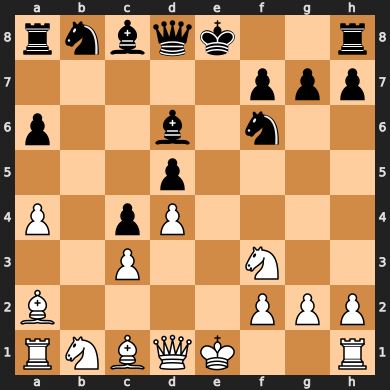

In [7]:
chessboard[333]

In [8]:
get_game_phase(chessboard[333])

'opening'

In [9]:
import numpy as np
def extract_features(board, phase):
    features = []
    
    # Example of phase-dependent feature extraction
    if phase == "opening":
        features.append(1)
        features.append(0)
        features.append(0)
        
        features.append(get_piece_activity(board))  
        features.append(get_king_safety(board)) 
        white_double, white_isolated, black_double, black_isolated = get_pawn_structure(board)
        features.append(white_double)
        features.append(white_isolated)
        features.append(black_double)
        features.append(black_isolated)
        features.append(get_center_control(board))
        features.append(get_mobility(board))
        features.append(get_hanging_pieces(board))
        features.append(0)
        features.append(0)
        features.append(0)
        features.append(0)
        features.append(0)
        features.append(0)
        features.append(get_king_attack_score(board, chess.WHITE))
        features.append(get_king_attack_score(board, chess.BLACK))
        features.append(0)
        features.append(0)
        features.append(0)
        features.append(0)
        features.append(get_queen_safety(board, chess.WHITE))
        features.append(get_queen_safety(board, chess.BLACK))
        
    elif phase == "middlegame":
        features.append(0)
        features.append(1)
        features.append(0)
        
        features.append(get_piece_activity(board)) 
        features.append(get_king_safety(board)) 
        white_double, white_isolated, black_double, black_isolated = get_pawn_structure(board)
        features.append(white_double)
        features.append(white_isolated)
        features.append(black_double)
        features.append(black_isolated)
        features.append(get_center_control(board))
        features.append(get_mobility(board))
        features.append(get_hanging_pieces(board))
        features.append(get_check_threats(board))
        features.append(get_bishop_pair(board))
        features.append(get_passed_pawns(board))
        features.append(get_pawn_islands(board))
        features.append(0)
        features.append(0)
        features.append(get_king_attack_score(board, chess.WHITE))
        features.append(get_king_attack_score(board, chess.BLACK))
        features.append(get_rook_pair_coordination(board, chess.WHITE))
        features.append(get_rook_pair_coordination(board, chess.BLACK))
        features.append(get_knight_outpost_score(board, chess.WHITE))
        features.append(get_knight_outpost_score(board, chess.BLACK))
        features.append(get_queen_safety(board, chess.WHITE))
        features.append(get_queen_safety(board, chess.BLACK))
        
    elif phase == "endgame":
        features.append(0)
        features.append(0)
        features.append(1)
        
        features.append(0)
        features.append(0)
        white_double, white_isolated, black_double, black_isolated = get_pawn_structure(board)
        features.append(white_double)
        features.append(white_isolated)
        features.append(black_double)
        features.append(black_isolated)
        features.append(0)
        features.append(get_mobility(board))
        features.append(get_hanging_pieces(board))
        features.append(get_check_threats(board))
        features.append(get_bishop_pair(board))
        features.append(get_passed_pawns(board))
        features.append(get_pawn_islands(board))
        features.append(get_king_activity(board, chess.WHITE))
        features.append(get_king_activity(board, chess.BLACK))
        features.append(0)
        features.append(0)
        features.append(get_rook_pair_coordination(board, chess.WHITE))
        features.append(get_rook_pair_coordination(board, chess.BLACK))
        features.append(0)
        features.append(0)
        features.append(get_queen_safety(board, chess.WHITE))
        features.append(get_queen_safety(board, chess.BLACK))
    
    return features



def board_to_features(chessboard):
    X_feature=[]
    for board in chessboard:
        phase = get_game_phase(board)
        features = extract_features(board, phase)
        X_feature.append(features)

    return X_feature

In [10]:
X_feature  = board_to_features(chessboard)

In [11]:
X_feature = np.array(X_feature)
X_feature[0]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 23.,  0.,  0.,
        0., -1.,  2., 14., 14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

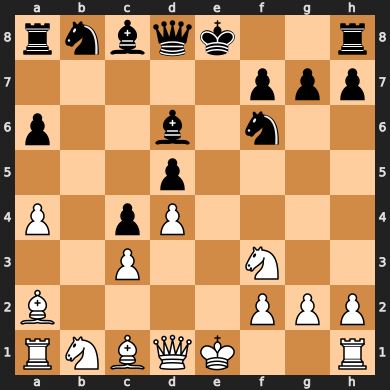

In [12]:
chessboard[333]

In [13]:
X[333]

array([[-0.6, -0.4, -0.5, -0.8, -1. ,  0. ,  0. , -0.6],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.2, -0.2, -0.2],
       [-0.2,  0. ,  0. , -0.5,  0. , -0.4,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.2,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0. , -0.2,  0.2,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2,  0. ,  0. ,  0.4,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0.2,  0.2,  0.2],
       [ 0.6,  0.4,  0.5,  0.8,  1. ,  0. ,  0. ,  0.6]])

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_feature is a numpy array of shape (num_samples, 26)
scaler = MinMaxScaler()

# Fit the scaler on X_feature and transform it
X_feature = scaler.fit_transform(X_feature)

In [15]:
combined_pickle_file = "features.pkl"
with open(combined_pickle_file, "wb") as file:
    pickle.dump((X_feature), file)

print(f"Combined dataset saved to {combined_pickle_file}")

Combined dataset saved to features.pkl


In [16]:
import pickle
path = "C:\\Users\\omvis\\chess_prediction_project\\test_dataset\\test_dataset.pkl"
with open(path,"rb") as file:
    X_test, id = pickle.load(file)

In [17]:
len(X_test)

8539

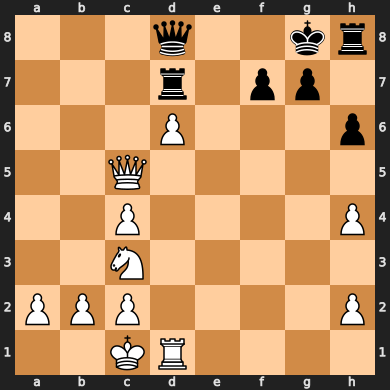

In [18]:
chessboard_test = []

def convert_to_board(X):
    for idx,matrix in enumerate(X):
        board = matrix_to_chess_board(matrix)
        chessboard_test.append(board)

convert_to_board(X_test)
chessboard_test[333]

In [19]:
def board_to_features(chessboard):
    X_feature=[]
    for board in chessboard:
        phase = get_game_phase(board)
        features = extract_features(board, phase)
        X_feature.append(features)

    return X_feature

In [20]:
X_feature_test = board_to_features(chessboard_test)

In [21]:
len(X_feature_test)

8539

In [22]:
len(X_feature_test[0])

26

In [23]:
X_feature_test[0]

[0,
 1,
 0,
 -6,
 0,
 0,
 0,
 1,
 3,
 -1,
 2,
 0,
 0,
 0,
 -6,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.6,
 0.0]

In [24]:
X_feature_test = np.array(X_feature_test)
X_feature_test[0]

array([ 0. ,  1. ,  0. , -6. ,  0. ,  0. ,  0. ,  1. ,  3. , -1. ,  2. ,
        0. ,  0. ,  0. , -6. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        1. ,  0. ,  1.6,  0. ])

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X_feature is a numpy array of shape (num_samples, 26)
scaler = MinMaxScaler()

# Fit the scaler on X_feature and transform it
X_feature_test = scaler.fit_transform(X_feature_test)

In [26]:
X_feature_test[0]

array([0.        , 1.        , 0.        , 0.29411765, 0.5       ,
       0.        , 0.        , 0.5       , 0.5       , 0.375     ,
       0.47222222, 0.42857143, 0.        , 0.5       , 0.14285714,
       0.53846154, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33333333, 0.        , 0.58762887,
       0.6       ])

In [27]:
combined_pickle_file = "features_test.pkl"
with open(combined_pickle_file, "wb") as file:
    pickle.dump((X_feature_test), file)

print(f"Combined dataset saved to {combined_pickle_file}")

Combined dataset saved to features_test.pkl
